# Exploratory Data Analysis of IPAGE Soil Data

### 1. Import Required Libraries

In [14]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load Data From Gsheet

In [6]:
import re

def convert_google_sheet_url(url):
    # Regular expression to match and capture the necessary part of the URL
    pattern = r'https://docs\.google\.com/spreadsheets/d/([a-zA-Z0-9-_]+)(/edit#gid=(\d+)|/edit.*)?'

    # Replace function to construct the new URL for CSV export
    # If gid is present in the URL, it includes it in the export URL, otherwise, it's omitted
    replacement = lambda m: f'https://docs.google.com/spreadsheets/d/{m.group(1)}/export?' + (f'gid={m.group(3)}&' if m.group(3) else '') + 'format=csv'

    # Replace using regex
    new_url = re.sub(pattern, replacement, url)

    return new_url

In [7]:
import pandas as pd

# Replace with your modified URL
url = 'https://docs.google.com/spreadsheets/d/1bwQyhW4bPA04sPy8JppZft_sM8O-j-DK06UDYR813Ik/edit?gid=0#gid=0'

new_url = convert_google_sheet_url(url)
new_url

'https://docs.google.com/spreadsheets/d/1bwQyhW4bPA04sPy8JppZft_sM8O-j-DK06UDYR813Ik/export?format=csv'

In [8]:
df = pd.read_csv(new_url)
df.head()

,Area,Data Collection Year,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,2005,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,2005,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,2005,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,2005,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.0
4,Mithpukur,2005,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Area                   618 non-null    object 
 1   Data Collection Year   618 non-null    int64  
 2   soil group             618 non-null    object 
 3   Land class             618 non-null    object 
 4   knit (surface)         461 non-null    object 
 5   pH                     618 non-null    object 
 6   SOC (%)                618 non-null    float64
 7   Nitrogen N (%)         618 non-null    object 
 8   Potassium K (meq/100)  618 non-null    object 
 9   Phosphorus P (ug/g)    618 non-null    object 
 10  Sulfur S (ug/g)        618 non-null    object 
 11  Boron B (ug/g)         618 non-null    object 
 12  Zinc Zn (ug/g)         618 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 62.9+ KB


### 3. Data Cleaning Function


Missing Values:
 Area                       0
Data Collection Year       0
soil group                 0
Land class                 0
knit (surface)           157
pH                         0
SOC (%)                    0
Nitrogen N (%)             0
Potassium K (meq/100)      0
Phosphorus P (ug/g)        0
Sulfur S (ug/g)            0
Boron B (ug/g)             0
Zinc Zn (ug/g)             0
dtype: int64


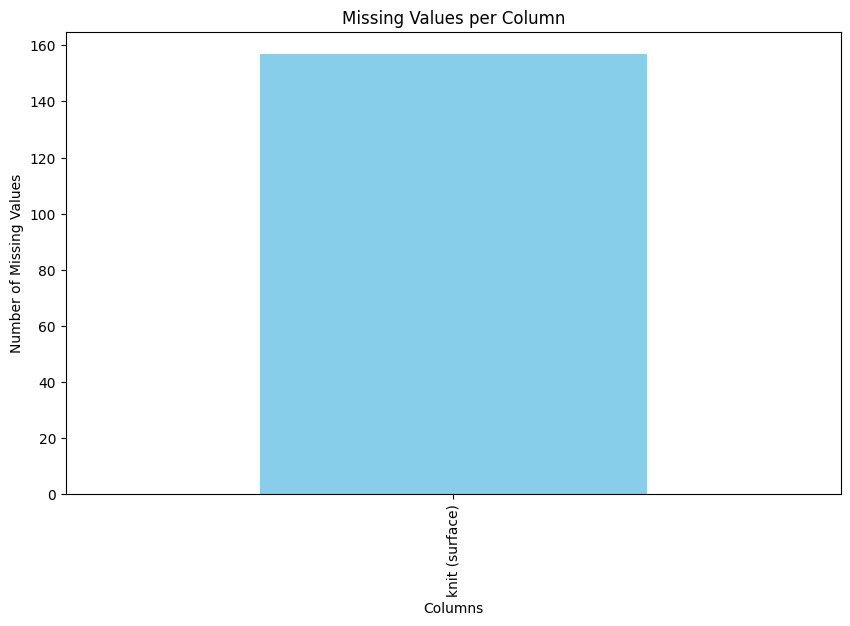

In [15]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Visualize missing values
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar', color='skyblue')
    plt.title('Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.show()
else:
    print("No missing values found.")

In [19]:
# Data Cleaning Function
def clean_data(data):
    """
    Cleans the data by handling missing values, duplicates, and ensuring correct data types.
    """
    # Drop duplicates if any
    data = data.drop_duplicates()

    # Handle missing values (simple strategy: fill with mean for numerical columns)
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    for column in numerical_columns:
        if data[column].isnull().sum() > 0:
            data[column].fillna(data[column].mean(), inplace=True)

    # Convert categorical columns to string types (if not already)
    categorical_columns = data.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        data[column] = data[column].astype(str)
    
    return data
data = clean_data(df)
data

,Area,Data Collection Year,soil group,Land class,knit (surface),pH,SOC (%),Nitrogen N (%),Potassium K (meq/100),Phosphorus P (ug/g),Sulfur S (ug/g),Boron B (ug/g),Zinc Zn (ug/g)
0,Mithpukur,2005,belab,high ground,Clay loam,5.0,1.27,0.08,0.15,19.6,37.7,0.26,0.86
1,Mithpukur,2005,belab,high ground,Clay loam,4.9,1.47,0.09,0.25,4.1,32.0,0.25,0.75
2,Mithpukur,2005,belab,high ground,Clay loam,4.6,1.07,0.05,0.09,13.3,13.5,0.27,0.95
3,Mithpukur,2005,belab,high ground,Clay loam,5.2,1.51,0.06,0.30,20.2,30.0,0.28,1.0
4,Mithpukur,2005,belab,high ground,Clay loam,5.3,1.08,0.11,0.17,20.5,27.8,0.30,1.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,Taraganj Thana,1997,Teesta sandy soil,Medium high land,nan,5.6,0.48,0.04,0.21,31,12,0.20,1.04
614,Taraganj Thana,1997,Teesta sandy soil,Medium high land,nan,6.7,0.36,0.05,0.04,9,7,0.20,0.36
615,Taraganj Thana,1997,Alluvial soil of Teesta,Medium high land,nan,5.9,0.73,0.04,0.17,24,9,0.37,0.44
616,Taraganj Thana,1997,Teesta sandy soil,Medium low land,nan,7.8,0.36,0.01,0.09,5,9,0.24,1.02


#### Check for missing values after cleaned data

In [20]:
# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Visualize missing values
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar', color='skyblue')
    plt.title('Missing Values per Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.show()
else:
    print("No missing values found.")


Missing Values:
 Area                     0
Data Collection Year     0
soil group               0
Land class               0
knit (surface)           0
pH                       0
SOC (%)                  0
Nitrogen N (%)           0
Potassium K (meq/100)    0
Phosphorus P (ug/g)      0
Sulfur S (ug/g)          0
Boron B (ug/g)           0
Zinc Zn (ug/g)           0
dtype: int64
No missing values found.


### 3. Descriptive Statistics and Distribution Analysis


Descriptive Statistics:


,Data Collection Year,SOC (%)
count,618.000000,618.000000
mean,2004.050162,1.792214
std,7.103021,1.034159
min,1990.000000,0.100000
25%,1997.000000,1.352500
50%,2005.000000,1.700000
75%,2005.000000,2.160000
max,2016.000000,20.400000


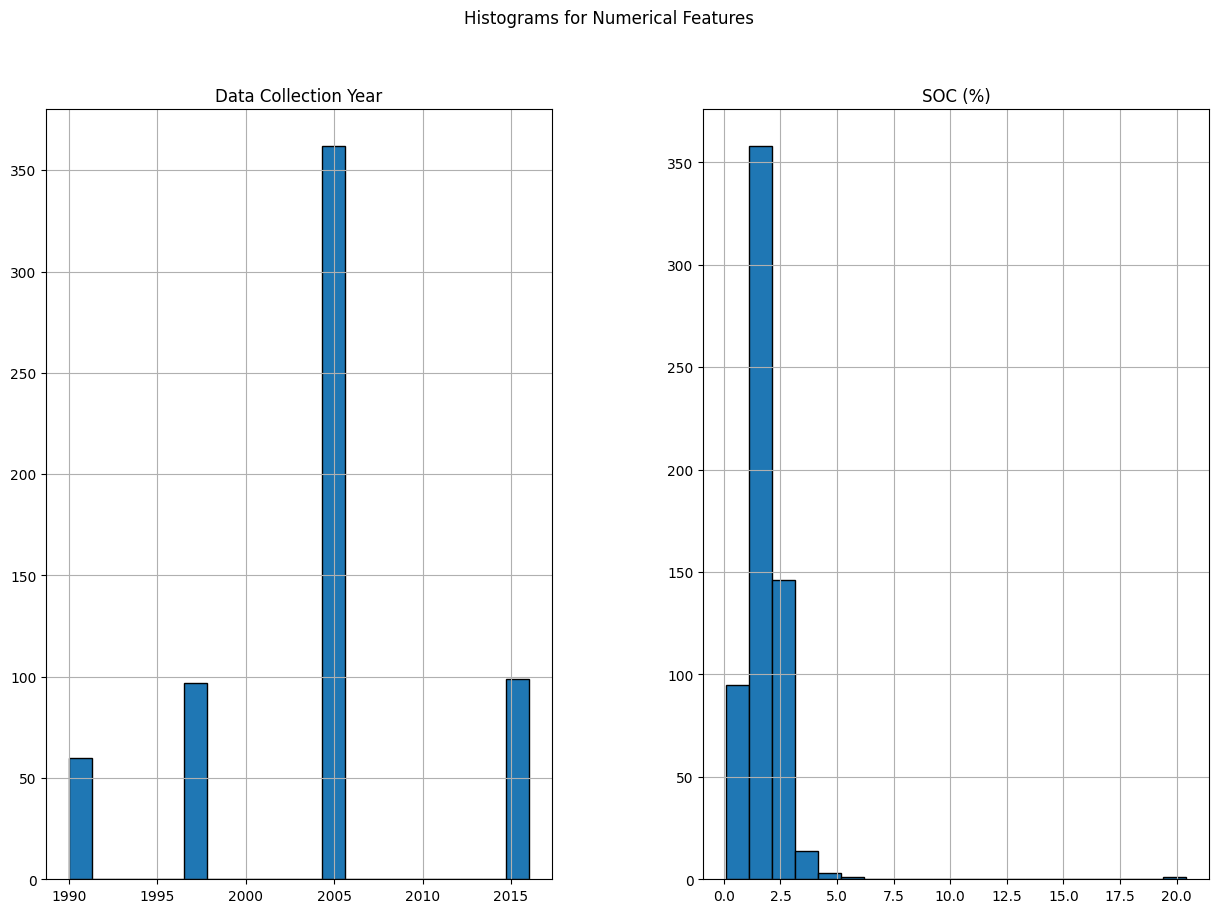

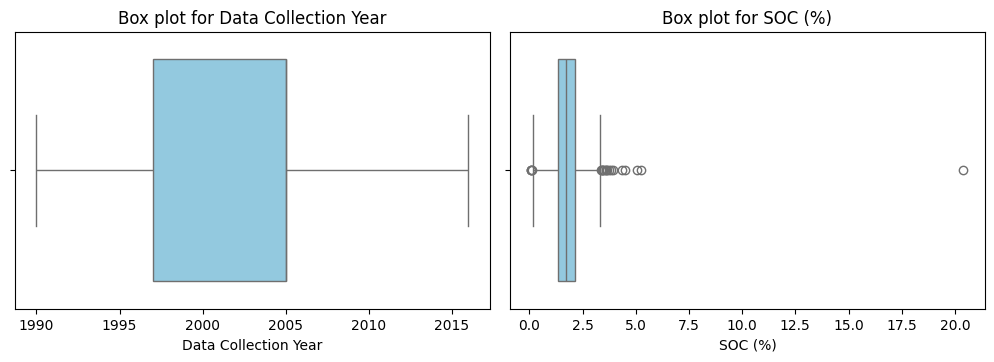

In [21]:
# Descriptive statistics
print("\nDescriptive Statistics:")
display(data.describe())

# Histograms for numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns].hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histograms for Numerical Features")
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f"Box plot for {col}")
plt.tight_layout()
plt.show()


### 4. Correlation Analysis

Compute the correlation matrix to see how numerical features are related, which helps in identifying potential predictive relationships.

In [22]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


ValueError: could not convert string to float: '0..36'

<Figure size 1200x800 with 0 Axes>

### 5. Data Preprocessing

In [ ]:
# Data Preprocessing Function
def preprocess_data(data, numerical_columns, categorical_columns):
    """
    Preprocesses the data by normalizing numerical features and one-hot encoding categorical features.
    """
    # Normalize numerical columns
    scaler = MinMaxScaler()
    data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
    
    # One-hot encode categorical columns
    data_encoded = pd.get_dummies(data, columns=categorical_columns)
    
    return data_encoded

In [11]:
df.describe()

,Data Collection Year,SOC (%)
count,618.000000,618.000000
mean,2004.050162,1.792214
std,7.103021,1.034159
min,1990.000000,0.100000
25%,1997.000000,1.352500
50%,2005.000000,1.700000
75%,2005.000000,2.160000
max,2016.000000,20.400000
